# HSMA 3B: Exercise 4 - Enhancing our Static Map Plots

Import the required packages.

In [45]:
import pandas as pd
import geopandas
import contextily as cx
import matplotlib.pyplot as plt



# import the package for adding basemaps
...
# import matplotlib.pyplot with the standard alias so we can access more advanced plot options
...

Ellipsis

## Core

### stats19 - Point Data

<Axes: >

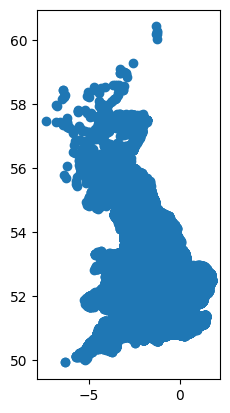

In [6]:
# stats19_collisions = pd.read_csv("../datasets/exercise_4/stats19_collisions_point_data_2022.csv")
stats19_collisions = pd.read_csv("../datasets/exercise_4/stats19_collisions_point_data_2022.csv", dtype={0:str, 1:str}, low_memory=False)
stats19_collisions_gdf = geopandas.GeoDataFrame(
    stats19_collisions,
    geometry = geopandas.points_from_xy(
        stats19_collisions['longitude'],
        stats19_collisions['latitude'],
    ),
    crs = 'EPSG:4326'
)

stats19_collisions_gdf.plot()

We want to add a basemap to our map.

We'd like to use EPSG 27700 for this, so we need to convert our dataframe using the '.to_crs()' method.

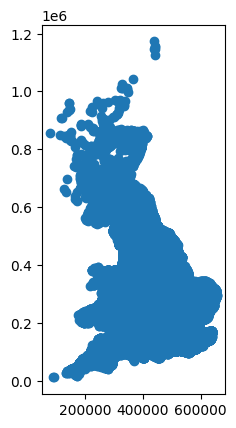

In [13]:
stats19_collisions_gdf_27700 = stats19_collisions_gdf.to_crs("EPSG:27700")
ax = stats19_collisions_gdf_27700.plot()

Now we can add a basemap. Start with a zoom level of 7.

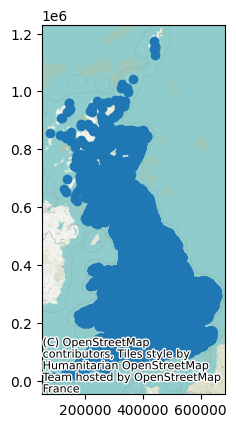

In [14]:
ax = stats19_collisions_gdf_27700.plot()

cx.add_basemap(
    ax, 
    crs=stats19_collisions_gdf_27700.crs.to_string(), 
    zoom=8
    )

Let's just zoom down to an area of the map. 

Plot the results again with a basemap. Do you need to change the zoom level of the basemap now? 

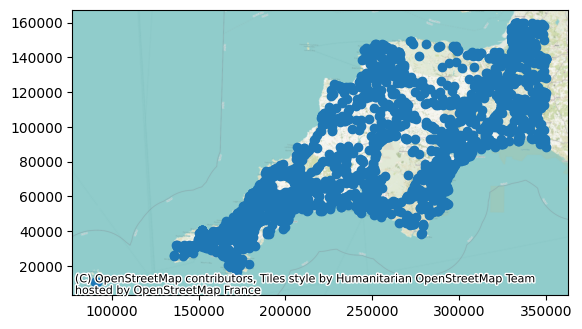

In [21]:
xmin, xmax = 0, 350000
ymin, ymax = 0, 160000

stats19_collisions_gdf_27700_se = stats19_collisions_gdf_27700.cx[xmin:xmax, ymin:ymax]
ax = stats19_collisions_gdf_27700_se.plot()

cx.add_basemap(
    ax, 
    crs=stats19_collisions_gdf_27700.crs.to_string(), 
    zoom=10
    )

## YOUR PLOT CODE HERE

Let's colour the points by the 'accident severity' column.

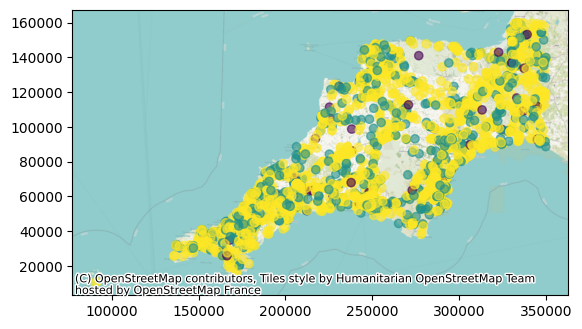

In [23]:
xmin, xmax = 0, 350000
ymin, ymax = 0, 160000

stats19_collisions_gdf_27700_se = stats19_collisions_gdf_27700.cx[xmin:xmax, ymin:ymax]
ax = stats19_collisions_gdf_27700_se.plot(
    column = 'accident_severity',
   # legend = True, 
   # legend_kwds = {'title': 'Accident Severity'},
    cmap='viridis', 
    alpha=0.6
)

cx.add_basemap(
    ax, 
    crs=stats19_collisions_gdf_27700.crs.to_string(), 
    zoom=10
    )

Let's now add a legend.

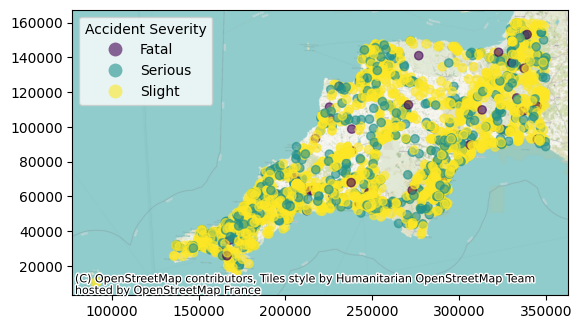

In [25]:
xmin, xmax = 0, 350000
ymin, ymax = 0, 160000

stats19_collisions_gdf_27700_se = stats19_collisions_gdf_27700.cx[xmin:xmax, ymin:ymax]
ax = stats19_collisions_gdf_27700_se.plot(
    column = 'accident_severity',
    legend = True, 
    legend_kwds = {'title': 'Accident Severity'},
    cmap='viridis', 
    alpha=0.6
)

cx.add_basemap(
    ax, 
    crs=stats19_collisions_gdf_27700.crs.to_string(), 
    zoom=10
    )

Finally, let's bring it all together. 

Plot the accident severity column, including a legend in your plot, and add a basemap.

In addition, you should
- turn the axis tick marks and labels off
- increase the size of the map to a figsize of (15, 10)
- set the opacity of the points to 0.6
- adjust the point size

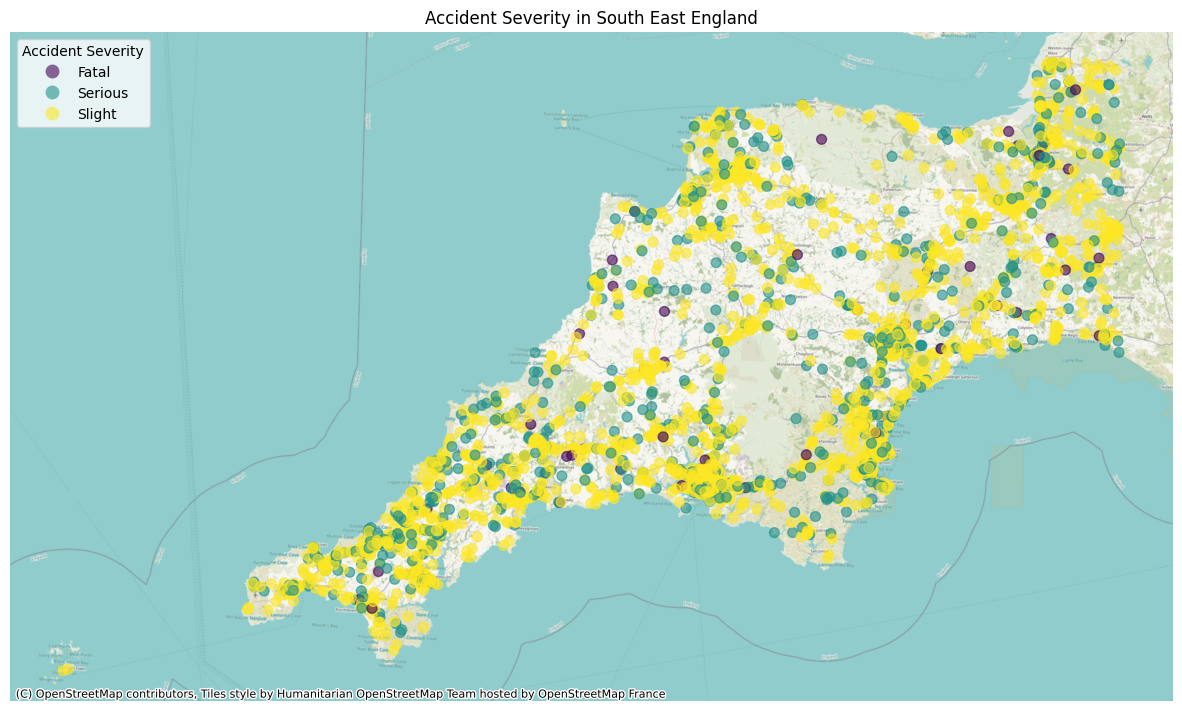

In [46]:
xmin, xmax = 0, 350000
ymin, ymax = 0, 160000

stats19_collisions_gdf_27700_se = stats19_collisions_gdf_27700.cx[xmin:xmax, ymin:ymax]
ax = stats19_collisions_gdf_27700_se.plot(
    column = 'accident_severity',
    figsize=(15, 10),
    legend = True, 
    legend_kwds = {'title': 'Accident Severity'},
    cmap='viridis', 
    alpha=0.6,
    markersize=50
)

ax.axis('off')

plt.title('Accident Severity in South East England')

cx.add_basemap(
    ax, 
    crs=stats19_collisions_gdf_27700.crs.to_string(), 
    zoom=10
    )




### stats19 - choropleths

Let's now look at what we can do with choropleths

In [47]:
stats19_choro_gdf = geopandas.read_file("../datasets/exercise_4/stats_19_counts_by_msoa_normalised_3857.geojson")

First, let's change the CRS to EPSG 27700.

In [48]:
stats19_choro_gdf_27700 = stats19_choro_gdf.to_crs("EPSG:27700")

Let's see what columns we have available to us for plotting. Look at the columns **attribute** of the geodataframe.

In [ ]:
## Your code here

Let's plot the contents of the column 'fog_or_mist_collisions_2018_2022_rate'.

Increase the plot size to (15,10)

In [ ]:
## YOUR CODE HERE

Now let's make some extra enhancements. 

- change the colourscheme to "Blues"
- set the polygon boundary width to 250,000 - 550,000 on the x axis and 350,000 to 700,000 on the y axis (a Northern portion of the UK)
- add a legend
- turn off the axis tickmarks and labels
- add a title
- making the edges between each polygon (area) black

*Hint: try setting the `linewidth` parameter after you have set the polygon edges to black - it can be a decimal...*

In [ ]:
## YOUR CODE HERE

## Extension

Now let's make a series of subplots for the columns that show a rate.

The code below will just filter the dataframe down to those columns, plus our geometry and MSOA columns.

I've added code to filter down to just Wales (more or less).

In [ ]:
stats19_choro_gdf_27700_wales = stats19_choro_gdf_27700.cx[150000:350000 , 175000:400000 ]
stats19_choro_gdf_27700_wales.plot()

In [ ]:
rate_column_list = stats19_choro_gdf_27700_wales.columns[stats19_choro_gdf_27700_wales.columns.str.contains('rate')]
rate_column_list

First, count how many columns there are so we can work out how to lay out our subplots.

In [ ]:
## YOUR CODE HERE

Now let's create our subplots. You can use the 'Blues' colourmap again, or choose a different colourmap.

https://matplotlib.org/stable/users/explain/colors/colormaps.html



In [ ]:
fix, axs = plt.subplots(..., ..., figsize=(20,15))

## Your code here

Finally, let's enhance our subplots by
- turning the axis off
- adding the column name as a title (don't worry about it being ugly!)

In [ ]:
## YOUR CODE HERE

### 3. A dental dataset

We're now going to work with a dataset of dentist activity for December 2023.

I've imported the dataset and filtered it to a region of the Northwest. The first 5 rows of the dataframe are shown below.


The data dictionary for this dataframe can be viewed here: https://opendata.nhsbsa.net/dataset/english-contractor-monthly-general-dental-activity/resource/e9e0e230-5667-4e48-9746-0ffcea11938a

In [ ]:
dentist_activity_dec_2023 = geopandas.read_file("../datasets/exercise_4/dentist_activity_dec_2023.geojson")
dentist_activity_dec_2023 = dentist_activity_dec_2023[dentist_activity_dec_2023['result_nhs_ha'] =="North West"]
dentist_activity_dec_2023 = dentist_activity_dec_2023.cx[:,450000:]
dentist_activity_dec_2023.head()

In [ ]:
dentist_activity_dec_2023.plot(figsize=(10,15))

Add a basemap.

In [ ]:
## YOUR CODE HERE

Add the practice name as a label.

In [ ]:
ax = dentist_activity_dec_2023.plot(figsize=(10,15))

# YOUR CODE HERE


Try using the adjust_text and textwrap packages to improve the layout of the labels so they are more readable. 


Note: No matter how hard you try, it may be difficult to get the labels to display nicely here. This can work well for smaller maps with fewer/shorter labels, but it's not a solution in all cases. Just try it out and see what improvement it makes over the unprocessed labels.

In [ ]:
## YOUR CODE HERE

Colour the practices by 'UDA_DELIVERED'

In [ ]:
## YOUR CODE HERE

Adjust the size of the values by 'UDA_DELIVERED'.

HINT: You may need to make a new column based on 'UDA_DELIVERED' and adjust it by dividing it so that the points aren't too big.

In [ ]:
## YOUR CODE HERE

Tidy up your map by 
- adding a title
- removing the axis values and tickmarks

In [ ]:
## YOUR CODE HERE

## Challenge: Bonus exercises

### 1. Create an inset map of a region of interest in your North England fog and mist collisions map

Take a look at the slides here on creating inset maps.

[LINK](https://docs.google.com/presentation/d/1nJ5Qmh7K5CXttRn_4eN5UzcVY5FBXqNiQCXW7BoDQ5s/edit?usp=sharing)

Try to adapt this code for your own map.

In [ ]:
## YOUR CODE HERE

### 2. For the point map of stats19 data, work out how you could make the point size correspond to severity - so 'fatal' accidents will have the largest point size.

In [ ]:
## YOUR CODE HERE

### 3. Return to your final version of the dentist map. How could you display the data on here more clearly? 

You could try zooming into smaller regions and plotting them on a series of subplots.

Hint: you may need to adapt the example here: https://adjusttext.readthedocs.io/en/latest/Examples-for-multiple-subplots.html


In [ ]:
## YOUR CODE HERE

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5b9a0342-1ee9-4024-886e-fd3cfaca1c00' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>